# Función para buscar ejemplos concretos de pares imagen - texto del Dataset 
 
Para comparar fácilmente textos generados en otros archivos con su twit original.

In [1]:
import random
from transformers import T5Tokenizer
import torch
import json
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

# Función para cargar datos
def load_data(base_path):
    with open(f'{base_path}/MMHS150K_GT.json', 'r') as f:
        data = json.load(f)

    with open(f'{base_path}/splits/train_ids.txt', 'r') as f:
        id_train = f.read().split()
    with open(f'{base_path}/splits/val_ids.txt', 'r') as f:
        id_val = f.read().split()
    with open(f'{base_path}/splits/test_ids.txt', 'r') as f:
        id_test = f.read().split()

    return data, id_train, id_val, id_test

# Función para mostrar las imágenes
def show_images(original_image, tweet_text):
    plt.imshow(original_image)
    plt.title(tweet_text)
    plt.axis('off')
    plt.show()

# Función para encontrar y mostrar el texto y la imagen asociados
def find_and_show_text_and_image(data, ids, img_dir, search_text):
    for tweet_id in ids:
        tweet_info = data[tweet_id]
        tweet_text = tweet_info['tweet_text']
        if search_text in tweet_text:
            img_path = f"{img_dir}/{tweet_id}.jpg"
            original_image = Image.open(img_path).convert('RGB')
            show_images(original_image, tweet_text)
            return
    print("Texto no encontrado en el conjunto de datos.")

# Ruta base
base_path = "./"

# Cargar datos y tokenizer
data, id_train, id_val, id_test = load_data(base_path)
img_dir = "./img_resized"

# Función principal para buscar el texto y mostrar la imagen
def main_find_text_and_image(search_text, dataset_type):
    if dataset_type == "train":
        find_and_show_text_and_image(data, id_train, img_dir, search_text)
    elif dataset_type == "val":
        find_and_show_text_and_image(data, id_val, img_dir, search_text)
    elif dataset_type == "test":
        find_and_show_text_and_image(data, id_test, img_dir, search_text)
    else:
        print("Tipo de conjunto de datos no válido. Usa 'train', 'val' o 'test'.")

# Ejemplo de uso
search_text = "Introduce aquí el texto a buscar"
dataset_type = "test"  # Puede ser "train", "val" o "test"
#main_find_text_and_image(search_text, dataset_type)


/home/javiermo/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/javiermo/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


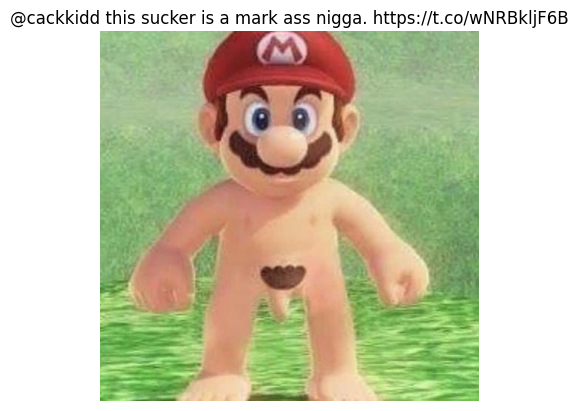

In [2]:
# Ejemplo de uso
search_text = "this sucker is a mark ass nigga"#"Democrats have gone full retard"
dataset_type = "val"  # Puede ser "train", "val" o "test"
main_find_text_and_image(search_text, dataset_type)